# **Term Structure of Interest Rates**

In [70]:
from datetime import datetime
from datetime import timedelta
import scipy.optimize as optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [71]:
def ytm_zero(p, maturity, fv=100):
  """
  p: coupon payment ($)
  fv: Face value ($)
  maturity: Time to maturity (years)

  Returns: Yield to maturity
  """
  ytm = (fv/p)**(1/maturity) - 1

  return round(100 * ytm, 2)

def df_zero(y, m):
  """
  y: Yield to maturity (%)
  m: Time to maturity (years)

  Returns: Discount factor
  """
  df = 1 / (1 + y/100)**m

  return round(df, 2)


def price_zero_bond(p, m, y):
  """
  p: coupon payment ($)
  m: Time to maturity (years)
  y: Yield to maturity (%)

  Returns: Price of a bond
  """
  price = 0
  for i in y:
    x = y.index(i)
    df = p[x] / (1 + y[x]/100)**m[x]
    price += df

  return price


def ytm_zero_bond(price, p, m, ytm=0.05):
  """
  price: price of the coupon bond ($)
  p: coupon payment ($)
  m: Time to maturity (years)

  Returns: Yield to maturity of a bond
  """

  ytm_func = lambda y : \
  sum([p[m.index(t)] / (1 + y)**t for t in m]) - price

  return round(100*optimize.newton(ytm_func, ytm), 2)

def SIR(sir, i=1):
  """
  sir: Spot interest rates dictionary {t (years): interest rate (%)} 
  i: Forward i-year

  Returns: Forward 1-year interest rates dictionary
  """

  fr = {}
  for t in sir:
    if t == i:
      fr[t-i] = sir[t]
    elif t > i:
      f = (((1 + sir[t]/100)**t / (1 + sir[t - 1]/100)**(t - i))**(1/i)) - 1 
      fr[t-i] = round(100*f, 2)

  return fr

def SIRD (data, years):
  sir = {}
  for y in years:
    sir[y] = data[y - 1]
  return sir

def SIRIT(sir, t, i):
  if t <= i:
    f = sir[t]/100
  else:
    f = (((1 + sir[t]/100)**t / (1 + sir[t - 1]/100)**(t - i))**(1/i)) - 1

  return round(100*f, 2)

### Calculate the YTM and the discount factors of the given zero-coupon bonds.

* Years: 1 - Price: 98.70 USD
* Years: 2 - Price: 101.70 USD
* Years: 3 - Price: 100.00 USD 

In [72]:
p = [98.7, 101, 100]
m = [1, 2, 3]

for i in p:
  ma = m[p.index(i)]
  ytm = ytm_zero(i, ma)
  df = df_zero(ytm, ma)
  print(f'Years: {ma}, YTM: {ytm}%, DF: ${df}')

Years: 1, YTM: 1.32%, DF: $0.99
Years: 2, YTM: -0.5%, DF: $1.01
Years: 3, YTM: 0.0%, DF: $1.0


### Use the give yield curve to calculate the price of the give coupon bond and then calculate the coupon bond's YTM

The Term-Structure of Interest Rates:

Maturity 	1	/ 2	/ 3

YTM 	3 %	/ 4 %	/ 5 %
			
Table of future cash flow:

Maturity 	1	/ 2	/ 3

Cash-flow	5,00 /	5,00 /	105,00

In [73]:
# price_zero_bond(p, m, y)
m = [1, 2, 3]
y = [3, 4, 5]
p = [5, 5, 105]


price = price_zero_bond(p, m, y)
print(f'Price: ${round(price, 2)}')

Price: $100.18


In [74]:
# ytm_zero_bond(price, p, m, ytm=0.05)
ytm = ytm_zero_bond(price, p, m, ytm=0.05)
print(f'YTM: {ytm}%')

YTM: 4.93%


### Calculate the 2-year forward 3 year interest rate, f(2, 3), for both Indonesia and Brazil.

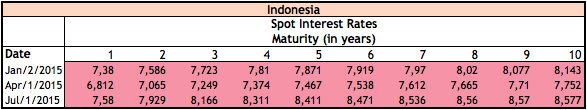

In [75]:
# SIRD (data, years)
# SIRIT(sir, t, i)
years = [1,	2,	3,	4,	5,	6,	7,	8,	9,	10]

data = [7.38,	7.586,	7.723,	7.81,	7.871,	7.919,	7.97,	8.02,	8.077,	8.143]
sir = SIRD (data, years)
print (f'jan/2/2015: {SIRIT(sir, 3, 2)}%')

data = [6.812,	7.065,	7.249,	7.374,	7.467,	7.538,	7.612,	7.665,	7.71,	7.752]
sir = SIRD (data, years)
print (f'apr/1/2015: {SIRIT(sir, 3, 2)}%')

data = [7.58,	7.929,	8.166,	8.311,	8.411,	8.471,	8.536,	8.56,	8.57,	8.577]
sir = SIRD (data, years)
print (f'jul/2/2015: {SIRIT(sir, 3, 2)}%')

jan/2/2015: 7.79%
apr/1/2015: 7.34%
jul/2/2015: 8.28%


### Calculate t-year forward 1-year interest rates and t-year forward 3-year interest rates curve and then t-year forward

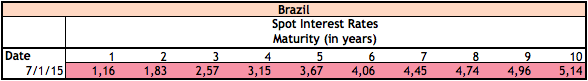

In [76]:
# SIRD (data, years)
data = [1.16,	1.83,	2.57,	3.15,	3.67,	4.06,	4.45,	4.74,	4.96,	5.14]
years = [1,	2,	3,	4,	5,	6,	7,	8,	9,	10]
sir = SIRD (data, years)

# SIR(sir, i=1)
fr1 = SIR(sir)
fr3 = SIR(sir, 3)
print(f'Forward 1-year interest rates: {fr1}')
print(f'Forward 3-year interest rates: {fr3}')

fir = {}
for y in years:
  f = SIRIT(sir, y, 1)
  fir[y-i] = round(100*f, 2)

print(f'1-year forward i-year interest rates: {fir}')

Forward 1-year interest rates: {0: 1.16, 1: 2.5, 2: 4.07, 3: 4.91, 4: 5.78, 5: 6.03, 6: 6.82, 7: 6.79, 8: 6.74, 9: 6.77}
Forward 3-year interest rates: {0: 2.57, 1: 3.34, 2: 4.02, 3: 4.45, 4: 4.97, 5: 5.23, 6: 5.4, 7: 5.56}
1-year forward i-year interest rates: {-99: 116.0, -98: 250.0, -97: 407.0, -96: 491.0, -95: 578.0, -94: 603.0, -93: 682.0, -92: 679.0, -91: 674.0, -90: 677.0}


### Calculate the discount factor and the par-yield.

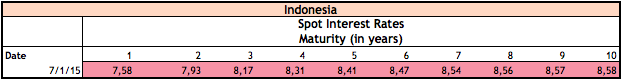